In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Tree and Forest

## 1 Read data

In [2]:
df_train = pd.read_csv('datasets/train.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

## 2 EDA and clean data

In [4]:
def reduce_mem_df(df):
    start_mem = df.memory_usage().sum() / 1024
    print(f'Memory usage start {start_mem} KB')

    for column in df.columns:
        col_type = df[column].dtype

        if col_type.kind != 'O':
            col_min = df[column].min()
            col_max = df[column].max()

            if df[column].dtype.kind == 'i':
                for int_param in [np.int8, np.int16, np.int32]:
                    if col_min > np.iinfo(int_param).min and col_max < np.iinfo(int_param).max:
                        df[column] = df[column].astype(int_param)
            else:
                for float_param in [np.float16, np.float32]:
                    if col_min > np.finfo(float_param).min and col_max < np.finfo(float_param).max:
                        df[column] = df[column].astype(float_param)
        else:
            df[column] = df[column].astype('category')

    end_mem = df.memory_usage().sum() / 1024
    print(f'memory after reduce {end_mem}')

    return df



In [5]:
reduce_mem_df(df_train)

Memory usage start 1562.625 KB
memory after reduce 693.84765625


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.000000,NaN,10.0,4,10.0,2014,0.075439,B,B,11,3097,0,NaN,0,0,B,305018.875000
1,3013,22,1.0,39.843750,23.171875,8.0,7,8.0,1966,0.118530,B,B,30,6207,1,1183.0,1,0,B,177734.546875
2,8215,1,3.0,78.312500,47.687500,10.0,2,17.0,1988,0.025604,B,B,33,5261,0,240.0,3,1,B,282078.718750
3,2352,1,1.0,40.406250,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.000000
4,13866,94,2.0,64.312500,38.562500,9.0,16,16.0,1972,0.282715,B,B,33,8667,2,NaN,0,6,B,343995.093750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.093750,33.281250,6.0,3,12.0,1981,0.300293,B,B,52,10311,6,NaN,1,9,B,119367.453125
9996,16265,27,2.0,64.312500,37.031250,9.0,13,0.0,1977,0.072144,B,B,2,629,1,NaN,0,0,A,199715.156250
9997,2795,178,1.0,29.640625,16.562500,5.0,3,5.0,1958,0.460449,B,B,20,4386,14,NaN,1,5,B,165953.906250
9998,14561,21,1.0,32.343750,22.328125,5.0,3,9.0,1969,0.194458,B,B,47,8004,3,125.0,3,5,B,171842.406250


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int32   
 1   DistrictId     10000 non-null  int32   
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     7887 non-null   float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int32   
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int32   
 13  Social_2       10000 non-null  int32   
 14  Social_3       10000 non-null  int32   
 15  Healthcare_1   5202 non-null   float32 
 16  Helthcare_2    10000 non-null  int32   
 17  Shops_1        10000 non-null  i

In [7]:

""" Drop column Healthcare_1 because it have 5743 not Nan"""
df_train.drop('Healthcare_1', axis=1, inplace=True)

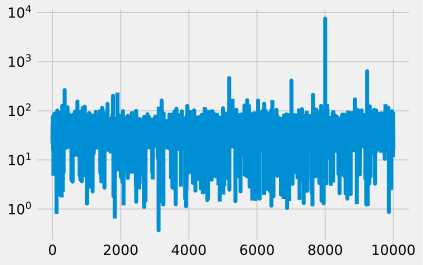

In [8]:
% matplotlib inline
% config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')
plt.plot(df_train["LifeSquare"])
plt.yscale(value='log')

In [9]:
df_train.loc[df_train['LifeSquare'] > 1000, 'LifeSquare'] = df_train['LifeSquare'].median()

In [10]:
df_train['LifeSquare'] = df_train['LifeSquare'].fillna(df_train['LifeSquare'].mean())

In [164]:
# df_train.to_pickle('df_train.pkl')
# df_train = pd.read_pickle('df_train.pkl')

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int32   
 1   DistrictId     10000 non-null  int32   
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     10000 non-null  float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int32   
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int32   
 13  Social_2       10000 non-null  int32   
 14  Social_3       10000 non-null  int32   
 15  Helthcare_2    10000 non-null  int32   
 16  Shops_1        10000 non-null  int32   
 17  Shops_2        10000 non-null  c

## 3 split on train and test

In [16]:
from sklearn.model_selection import train_test_split

In [11]:


df_train = pd.read_pickle('df_train.pkl')
df_id = df_train['Id']
df_train.drop('Id', axis=1, inplace=True)

***
***
***

In [14]:
def data_split(df, test_size, random_state):
    x = df.drop('Price', axis=1)
    y = df['Price']

    return train_test_split(x, y, test_size=test_size, random_state=random_state)

In [17]:
x_train, x_valid, y_train, y_valid = data_split(df_train, 0.3, 49)

## 4 and 5 Data processing and Built model

scale model - StandardScale, MinMaxScaler, RobustScaler

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [20]:
rb_scaler = RobustScaler()

In [29]:
x_train = pd.get_dummies(x_train)
x_valid = pd.get_dummies(x_valid)

***
***

In [28]:
x_train = rb_scaler.fit_transform(x_train)

In [30]:
x_valid = rb_scaler.transform(x_valid)

In [31]:
def model_tree_regression(max_deep, max_feat, x_train, y_train, x_valid):
    tree_model = DecisionTreeRegressor(max_depth=max_deep, max_features=max_feat, random_state=49)
    tree_model.fit(x_train, y_train)
    y_pred_valid = tree_model.predict(x_valid)
    y_pred_train = tree_model.predict(x_train)

    return y_pred_train, y_pred_valid


y_pred_train, y_pred_valid = model_tree_regression(5, 5, x_train, y_train, x_valid)

In [36]:
from pylab import rcParams

print(r2_score(y_valid, y_pred_valid), ' Valid')
print(r2_score(y_train, y_pred_train), ' Train')

0.5293360291371254  Valid
0.5515523575827799  Train


In [131]:
x = [1, 2, 3, 4, 5, 6, 7]
y = np.random.randint(1, 14, 7)
y_2 = [i**2 for i in y]
x_2 = [i**2 for i in x]

del(x, y, y_2, x_2)

rcParams['figure.figsize'] = 4, 4
plt.plot(x, y, label='x=y', linestyle='dashed')
plt.plot(x, y_2, label='x=y**2', linestyle='dotted', linewidth=3)
# legend = plt.legend(loc='upper right')
# plt.setp(legend.get_texts(), color='grey')
plt.legend(fontsize=10, loc='upper center')
plt.grid( color='green')

In [133]:
a = np.arange(2, 21)

r2_valid_list = list()
r2_train_list = list()
for val in a:
    y_pred_train, y_pred_valid = model_tree_regression(max_deep=val, max_feat=None, x_train=x_train, y_train=y_train, x_valid=x_valid)
    r2_tr = r2_score(y_train, y_pred_train)
    r2_val = r2_score(y_valid, y_pred_valid)
    r2_valid_list.append(r2_val)
    r2_train_list.append(r2_tr)
    print(r2_tr, f' Train where max_depth={val}', '\n',
          r2_val, f'Valid where max_depth={val}', '\n')

0.44194575511476175  Train where max_depth=2 
 0.44055713345333414 Valid where max_depth=2 

0.5175172744867773  Train where max_depth=3 
 0.5183983707234396 Valid where max_depth=3 

0.5710663328835901  Train where max_depth=4 
 0.5581247084803909 Valid where max_depth=4 

0.613179459752555  Train where max_depth=5 
 0.5949648209003869 Valid where max_depth=5 

0.6562376051429128  Train where max_depth=6 
 0.6247682426258006 Valid where max_depth=6 

0.703102596628931  Train where max_depth=7 
 0.6408931364854891 Valid where max_depth=7 

0.7357873951757581  Train where max_depth=8 
 0.6486336108656794 Valid where max_depth=8 

0.7703595766324456  Train where max_depth=9 
 0.6513274131157456 Valid where max_depth=9 

0.8068708574234646  Train where max_depth=10 
 0.641978082665081 Valid where max_depth=10 

0.8409570004843795  Train where max_depth=11 
 0.6390299527952157 Valid where max_depth=11 

0.8759149336460887  Train where max_depth=12 
 0.6077867555287801 Valid where max_depth

(2.0, 10.0)

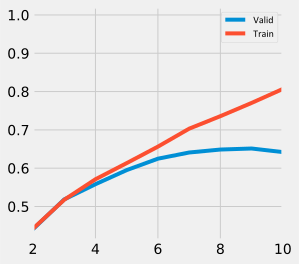

In [141]:
font_dict = {'family': 'Calibri', 'size':10}
plt.plot(a, r2_valid_list, label='Valid')
plt.plot(a, r2_train_list, label='Train')
plt.legend(loc='upper right', prop=font_dict)
plt.xlim(2, 10)

## Decision Tree Regression give best result when parameter max_depth is for 8 till 9
0.7357873951757581
***
## Train where max_depth = 9
****
0.6486336108656794 Valid where max_depth=8

0.7703595766324456  Train where max_depth=9

0.6513274131157456 Valid where max_depth=9

In [195]:
from sklearn.metrics import mean_squared_error

a = range(1, 21)
mean_squared_train = list()
mean_squared_valid = list()
r2_train_list =list()
r2_valid_list = list()
for val in a:
    y_pred_train, y_pred_valid = model_tree_regression(9, val, x_train, y_train, x_valid)
    r2_val = r2_score(y_valid, y_pred_valid)
    r2_tr = r2_score(y_train, y_pred_train)
    squared_error_val = mean_squared_error(y_valid, y_pred_valid)
    squared_error_tr = mean_squared_error(y_train, y_pred_train)
    r2_train_list.append(r2_tr)
    r2_valid_list.append(r2_val)
    mean_squared_train.append(squared_error_tr)
    mean_squared_valid.append(squared_error_val)
    print(r2_val, '\t', squared_error_val, f'Valid', '\n',
          r2_tr, '\t', squared_error_tr, 'Train', '\a', f'Where max_feature={val}', '\n')

0.5311252244207538 	 4088708484.414358 Valid 
 0.6065007372118907 	 3377529661.9756722 Train  Where max_feature=1 

0.5031626348043625 	 4332549448.709126 Valid 
 0.6144045424712 	 3309688780.8602953 Train  Where max_feature=2 

0.5371161988735274 	 4036465648.2654037 Valid 
 0.7222986858695619 	 2383598939.9305196 Train  Where max_feature=3 

0.5839620262194081 	 3627958000.371814 Valid 
 0.7373692239108431 	 2254243705.8299437 Train  Where max_feature=4 

0.6108107807052916 	 3393829964.529466 Valid 
 0.757626651463543 	 2080367744.9201775 Train  Where max_feature=5 

0.6153339669049429 	 3354386618.9832006 Valid 
 0.778071736336244 	 1904881061.3877063 Train  Where max_feature=6 

0.6398983997023251 	 3140178455.045604 Valid 
 0.7486611750634803 	 2157321288.0104485 Train  Where max_feature=7 

0.6045054353159016 	 3448814195.999185 Valid 
 0.7758165659728635 	 1924237907.805046 Train  Where max_feature=8 

0.6180403005682279 	 3330786694.2547708 Valid 
 0.7761176153090864 	

***
## max_feature = 16

mean_error = 54417
***

In [196]:
mean_squared_train = [round(i) for i in mean_squared_train]
mean_squared_valid = [round(i) for i in mean_squared_valid]

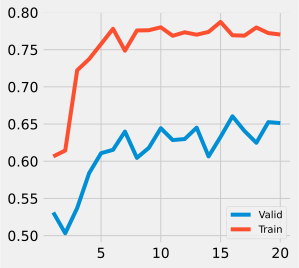

In [202]:
plt.plot(a, r2_valid_list, label='Valid')
plt.plot(a, r2_train_list, label='Train')
plt.legend(fontsize=10)

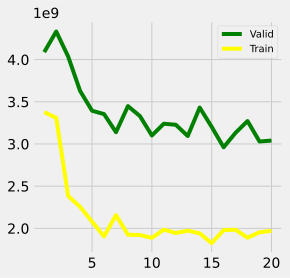

In [203]:
plt.plot(a, mean_squared_valid, label='Valid', color='green')
plt.plot(a, mean_squared_train, label='Train', color='yellow')
plt.legend(fontsize=10)

In [206]:
# round(np.sqrt(mean_squared_valid[15]))

54417

In [209]:
class TreeModel:
    def __init__(self, x_tr, x_val, y_tr, y_val):
        self.y_train = y_tr
        self.y_valid = y_val
        self.x_train = self.scale_fit_train(x_tr)
        self.x_valid = self.scale_transform_valid(x_val)
        y_pred_valid = self.model_start(9, 16)
        self.metrics_score(y_pred_valid)

    def scale_fit_train(self, df):
        self.rbs = RobustScaler()
        df_transform = self.rbs.fit_transform(df)
        return df_transform

    def scale_transform_valid(self, df):
        df_transform = self.rbs.transform(df)
        return df_transform

    def model_start(self, max_deep, max_feat):
        model = DecisionTreeRegressor(max_depth=max_deep, max_features=max_feat, random_state=49)
        y_pred_valid = self.get_pred_valid(model)
        return y_pred_valid

    def get_pred_valid(self, model):
        fit_model = model.fit(self.x_train, self.y_train)
        y_pred = fit_model.predict(self.x_valid)
        self.y_pred_train = fit_model.predict(self.x_train)
        return y_pred

    def metrics_score(self, y_pred_valid):
        print(r2_score(self.y_valid, y_pred_valid))

In [210]:
my_model = TreeModel(x_train, x_valid, y_train, y_valid)

0.6604239556745983
